# Mushroom Project

## Data set Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [2]:
# import important libraries

import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report # to check for precision, recall and f1 score
from sklearn.metrics import accuracy_score # to check the accuracy score upto 16 decimal places
from sklearn.model_selection import cross_val_score # to check for overfitting
from sklearn.model_selection import GridSearchCV # used for hyper parameter tuning

In [4]:
# Now I will read the raw mushroom.csv

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# print the shape of the dataset
df.shape

(8124, 23)

In [6]:
# How many missing values are in each column and of what data types they are?

print(); print("Database has {} observations (instances) and {} columns (attributes).".format(df.shape[0],df.shape[1]))
print(); print("Missing values in each column:\n{}".format(df.isnull().sum()))
print(); print("Columns data types:\n{}".format(df.dtypes))


Database has 8124 observations (instances) and 23 columns (attributes).

Missing values in each column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Columns data types:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     obj

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There is no missing values in dataset. It has 23 feature including one target variable. All feature are with object datatype.

# Data Analysis and Data Visualisation

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


If we compare count and frequecy from above table, we can easily notic that feature like gill attachment,gill spacing, veil color, ring number are did not indicate any definitive characteristics to classify mushroom as ediable or posionous.

In [14]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Class "P" repersent "Posionous Mushroom" and Class "E" repersent "Ediable Mashroom" 

In [16]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

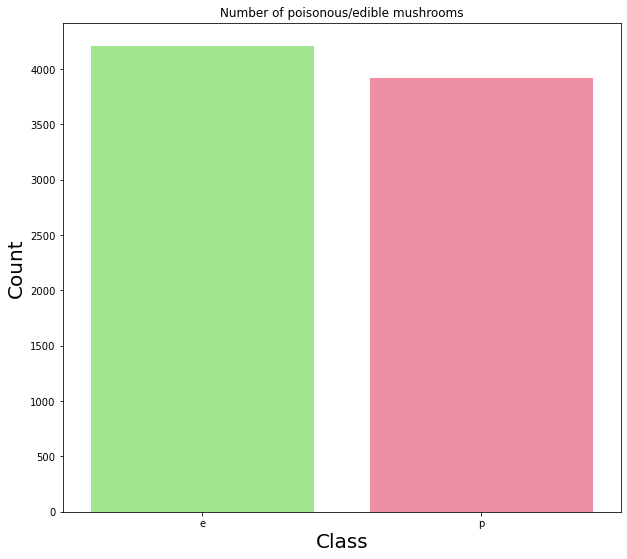

In [22]:
count = df['class'].value_counts()
plt.figure(figsize=(10,9))
sns.barplot(count.index,count.values, alpha=0.5, palette='prism')
plt.ylabel('Count',fontsize=20)
plt.xlabel('Class', fontsize=20)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

We can see Dataset is balanced in natural format and has enough counts of Both class

In [23]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [25]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Ploting countplot of features Vs Class

In [26]:
def feature_class_plot(hue,features):
    for i, col in enumerate(features.columns):
        plt.figure(i)
        plt.figure(figsize=(7,5))
        ax = sns.countplot(x=df[col], hue=hue,data=df)

<Figure size 432x288 with 0 Axes>

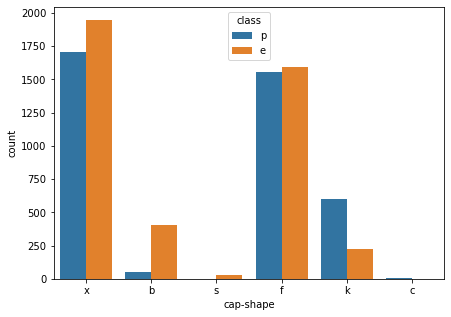

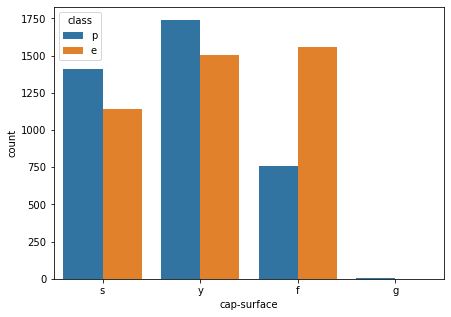

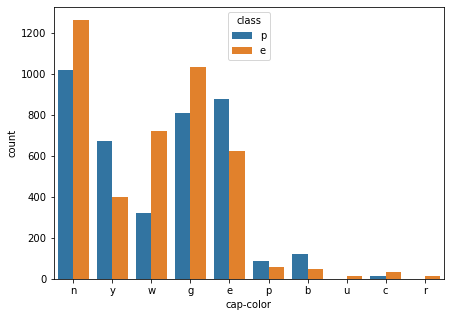

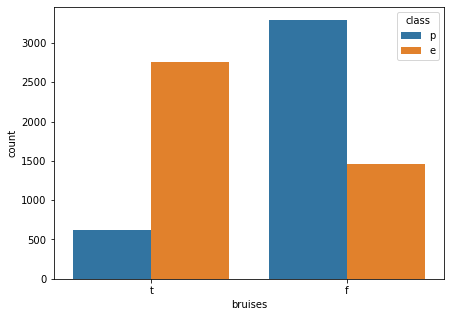

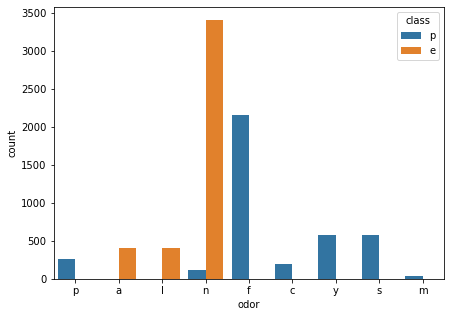

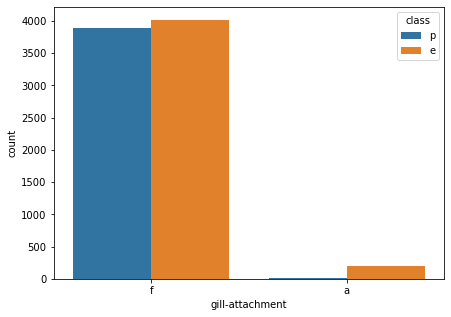

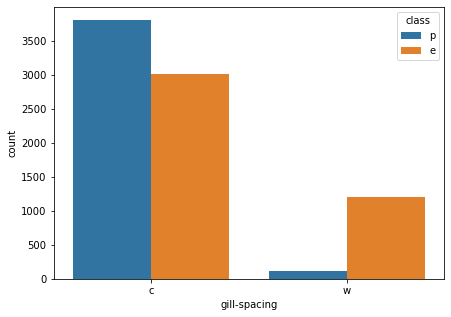

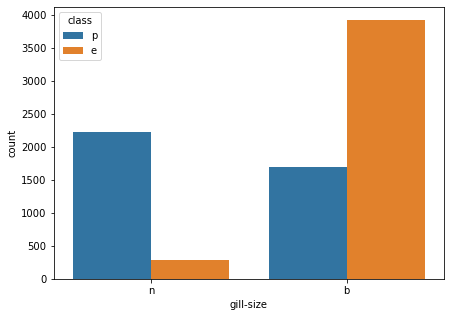

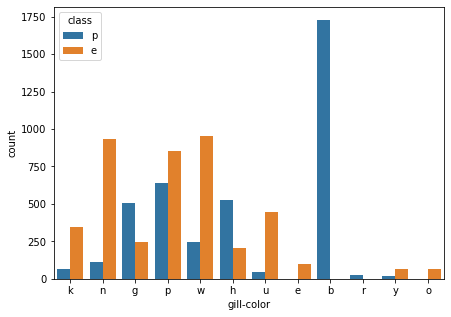

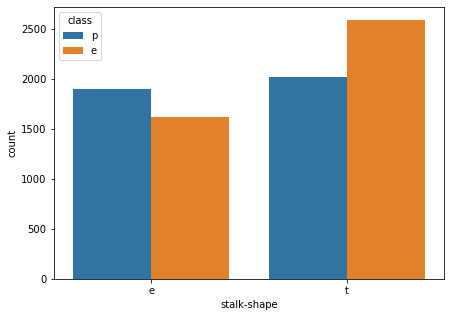

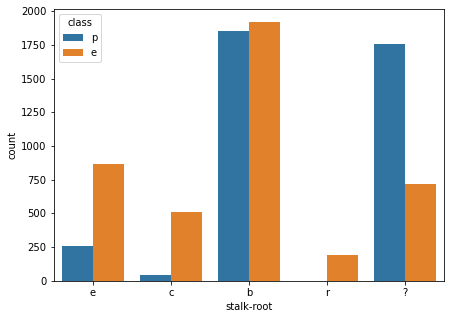

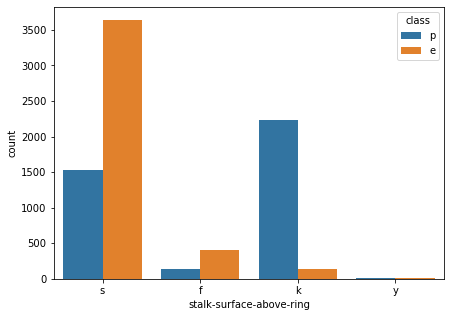

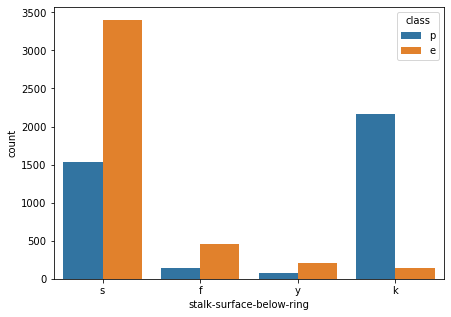

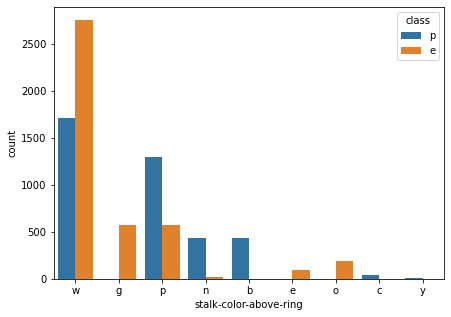

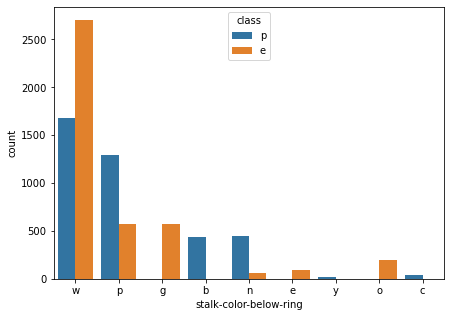

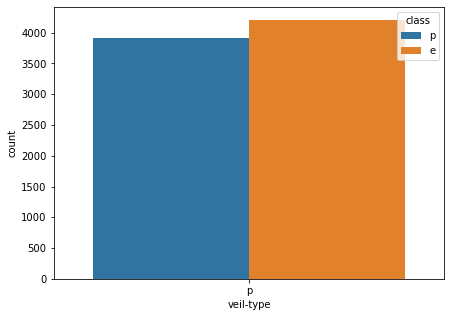

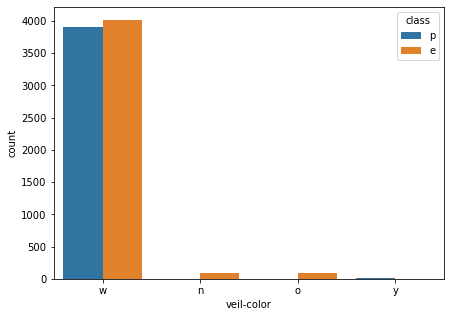

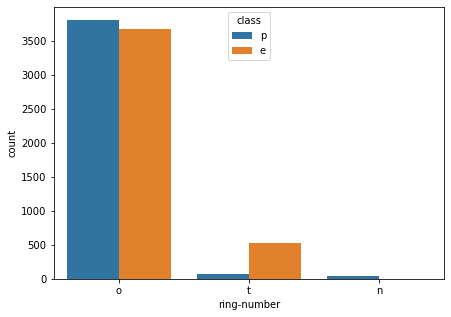

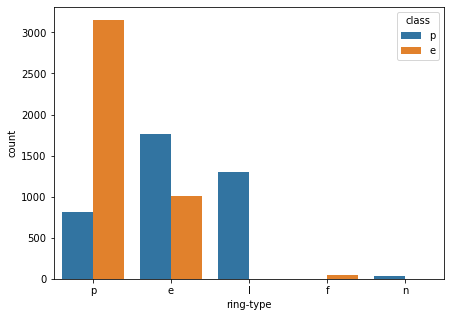

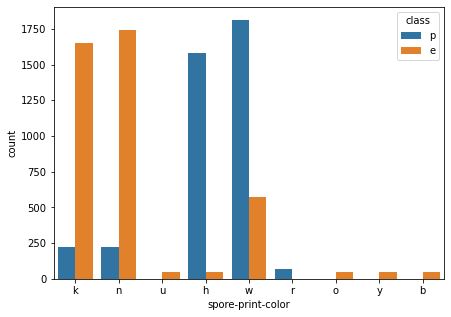

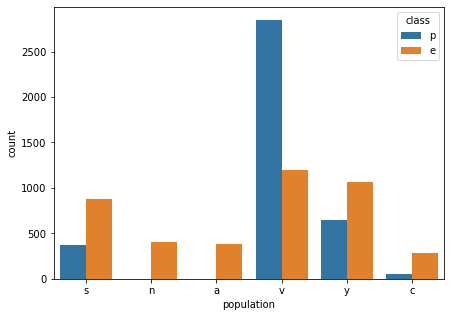

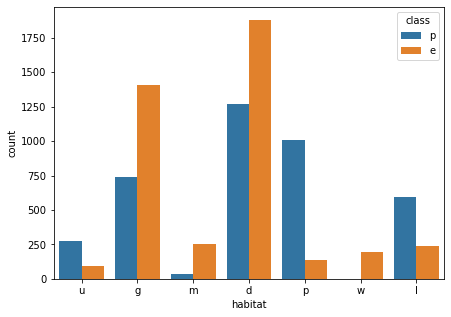

In [27]:
hue = df['class']
features = df.drop('class', 1)
feature_class_plot(hue,features)

# Encoding

In [29]:
# Label Encoder

conversion = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    conversion_dict = {index: label for index, label in enumerate(encoder.classes_)}
    conversion.append(conversion_dict)

In [30]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [32]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [33]:
df['veil-type'].unique()

array([0])

In [34]:
df = df.drop(['veil-type'], axis=1)

The column "Veil-type" is 0 not contributing in data so that remove it.

In [35]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

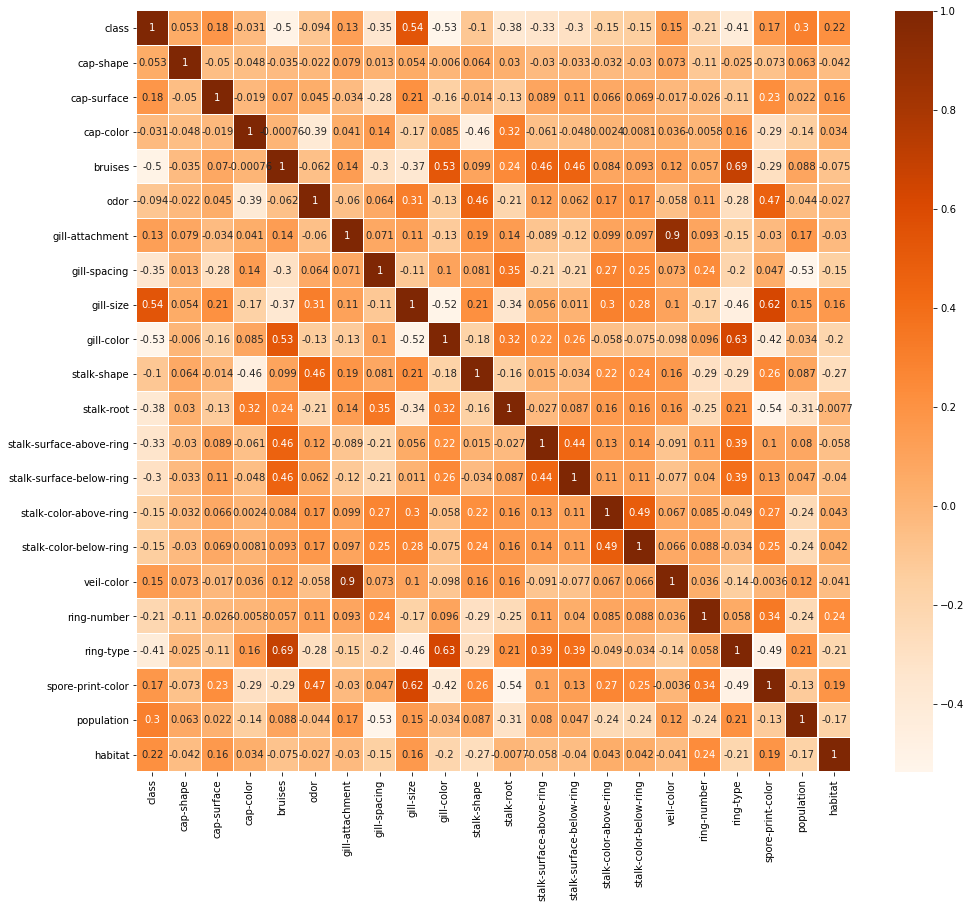

In [43]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), linewidths=.1, cmap='Oranges', annot= True)

1. Gill attachment (2 unique subcategories) and veil color (4 unique subcategories) are highly correlated with each other more than 90%. So we can keep one feature and drop other feature.

2. Ring type (5 unique subcategories) and Bruises (2 unique subcategories) are highly correlated with each other (69%).

3. Gill color(12 unique subcategories) and Ring type (5 unique subcategories) are 62% correlated with each other.

4. Spore print color(9 unique subcategories) and gill size(2 unique subcategories) are 62% correlated with each other.

From above data we can remove one feature which having less subcategories and keep other feature to check there exist any relation between subcategories and class of mushroom.

But before that let look at multicollinearity between feature.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
X= df.drop(columns=['class'])
Y= df['class']

In [46]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,5.463186,cap-shape
1,3.904712,cap-surface
2,5.950600,cap-color
3,7.984231,bruises
4,8.918271,odor
5,256.122838,gill-attachment
6,4.534113,gill-spacing
7,5.758180,gill-size
8,6.284702,gill-color
9,9.243136,stalk-shape


We can see that gill-attachment, veil-color,ring-number,population, spore-print-color has high collinearity.

On basis of Correlation and multicollinearity we can now remove Ring-type,bruises, veil-color, spore-print-color, ring -number, gill-attachment from dataset

In [47]:
df= df.drop(['veil-color','ring-type','bruises','spore-print-color','ring-number','gill-attachment'], axis=1)

In [48]:
# shpae of dataset after removing some features
df.shape 

(8124, 16)

Checking Heatmap after removing some outliers

<AxesSubplot:>

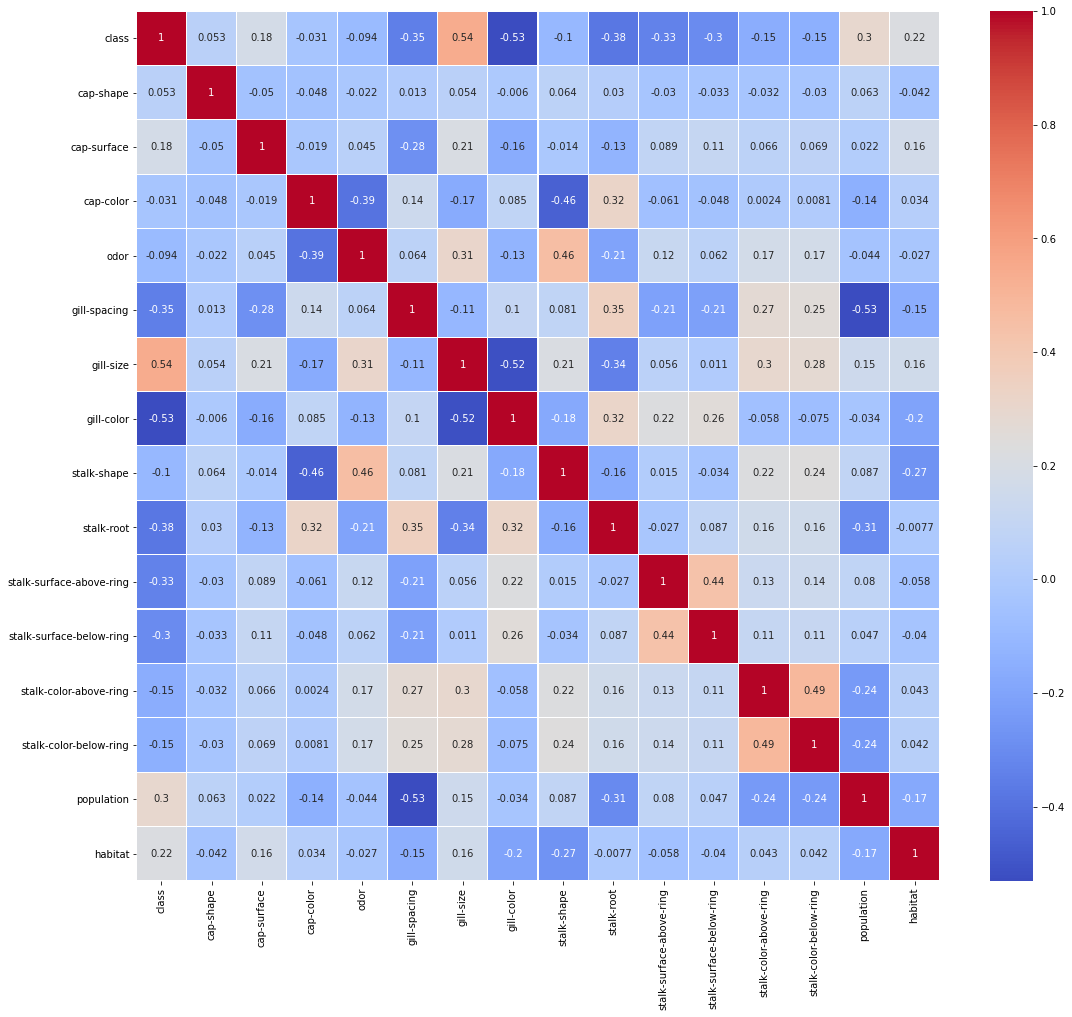

In [49]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), linewidths=.1, cmap='coolwarm', annot= True)

Checking multicollinearity after removal of feature

In [50]:
X= df.drop(columns=['class'])
Y= df['class']

In [51]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features']= X.columns
vif

,vif,Features
0,5.060168,cap-shape
1,3.619876,cap-surface
2,5.386184,cap-color
3,6.728792,odor
4,2.277863,gill-spacing
5,2.741394,gill-size
6,4.869965,gill-color
7,4.187318,stalk-shape
8,3.269927,stalk-root
9,10.087702,stalk-surface-above-ring


### Applying Machine Learning Algorithm

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5443, 15)
Training target vector size: (5443,)
Test feature matrix size: (2681, 15)
Test target vector size: (2681,)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=167, test_size=.33)
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9462886982469227


Confusion matrix of Logistics Regression : 
 [[1374   50]
 [  94 1163]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1424
           1       0.96      0.93      0.94      1257

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [60]:
mnb = MultinomialNB()
svc=SVC()
dtc = DecisionTreeClassifier()

model = [mnb,svc,dtc]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix MultinomialNB() is


Accuracy Score :
 0.8314061917195077


Confusion matrix : 
 [[1301  123]
 [ 329  928]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1424
           1       0.88      0.74      0.80      1257

    accuracy                           0.83      2681
   macro avg       0.84      0.83      0.83      2681
weighted avg       0.84      0.83      0.83      2681



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9820962327489743


Confusion matrix : 
 [[1417    7]
 [  41 1216]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1424
           1       0.99      0.97      0.98      1257

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98  